In [675]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ucimlrepo import fetch_ucirepo 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.svm import SVC,SVR
from sklearn.datasets import make_classification,make_regression
import joblib
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# Import for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# Import for regression
from sklearn.tree import DecisionTreeRegressor


In [676]:
base_path= '/home/mr-arthor/Desktop/CDAC/Practical_Machine_Learning/Lab_Work/Datasets'
Launch_Path= 'Models/'
os.makedirs(Launch_Path, exist_ok=True)


In [677]:
def eda(df, target, type='a'):  # Exploratory Data Analysis


    # Display unique label count
    unique_count = df[target].nunique()
    print("Label Count =", unique_count)

    # Type 'a': Standard preprocessing
    if type == 'a':
        for col in df.select_dtypes(include=['object']).columns:
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])
        # Handle missing values
        print(df.isnull().sum())
        df.fillna(df.mean(), inplace=True)  
        x = df.drop(columns=[target])
        y = df[target]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        # Apply StandardScaler and MinMaxScaler
        sc = StandardScaler()
        x_train = sc.fit_transform(x_train)
        x_test = sc.transform(x_test)

        scaler = MinMaxScaler()
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)

        print(df.shape)
        return x_train, x_test, y_train, y_test

    # Type 'b': TF-IDF for text data
    if type == 'b':
        df.dropna(inplace=True)
        x = df[target].astype(str)  # Use only the text column for vectorization
        y = df[target]

        # Ensure labels are categorical
        if not y.dtype == 'object':
            label_encoder = LabelEncoder()
            y = label_encoder.fit_transform(y)

        x_train_raw, x_test_raw, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

        vectorizer = TfidfVectorizer()
        x_train = vectorizer.fit_transform(x_train_raw)
        x_test = vectorizer.transform(x_test_raw)

        return x_train, x_test, y_train, y_test


In [678]:

def SVC_Func(x_train, x_test, y_train, y_test, parameters, CV, Ver, name):
    model_path = Launch_Path + name + '.pkl'
    
    if os.path.exists(model_path):
        print("Model already trained and saved at", model_path)
    else:
        classifier = SVC()
        grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, n_jobs=-1, cv=CV, verbose=Ver)
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
        y_pred = grid_search.predict(x_test)
        ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
        print(classification_report(y_test, y_pred))
        best_model = grid_search.best_estimator_
        joblib.dump(best_model, model_path)
        print("Best model saved to", model_path)


In [679]:
# def SVC_Func(x_train, x_test, y_train, y_test,parameters,CV,Ver,name):
#     classifier = SVC()
#     grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, n_jobs=-1, cv=CV,verbose=Ver)
#     grid_search.fit(x_train, y_train)
#     print(grid_search.best_params_)
#     y_pred = grid_search.predict(x_test)
#     ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
#     print(classification_report(y_test, y_pred))
#     best_model = grid_search.best_estimator_
#     joblib.dump(best_model, Launch_Path+name+'.pkl')
#     print("Best model saved to 'best_model.pkl'")
   


In [680]:

def SVR_Func(x_train, x_test, y_train, y_test, parameters, CV, Ver, name,bypass=True):
    model_path = Launch_Path + name + '.pkl'
    
    if os.path.exists(model_path) and bypass:
        print("Model already trained and saved at", model_path)
    else:
         
        grid_search = GridSearchCV(SVR(), param_grid=parameters, n_jobs=-1, cv=CV, verbose=Ver)
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
        y_pred = grid_search.predict(x_test)
        print("Mean Square Error", mean_squared_error(y_test, y_pred))
        print("Mean Absolute Error", mean_absolute_error(y_test, y_pred))
        print("R2 Score", r2_score(y_test, y_pred))
        best_model = grid_search.best_estimator_
        joblib.dump(best_model, model_path)
        print("Best model saved to", model_path)


In [681]:
def DTC_Func(x_train, x_test, y_train, y_test, parameters, CV, Ver, name):
    model_path = Launch_Path + name + '.pkl'
    
    if os.path.exists(model_path):
        print("Model already trained and saved at", model_path)
    else:
        classifier = DecisionTreeClassifier()
        grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, n_jobs=-1, cv=CV, verbose=Ver)
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
        y_pred = grid_search.predict(x_test)
        ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
        print(classification_report(y_test, y_pred))
        best_model = grid_search.best_estimator_
        joblib.dump(best_model, model_path)
        print("Best model saved to", model_path)


In [682]:
def DTR_Func(x_train, x_test, y_train, y_test, parameters, CV, Ver, name):
    model_path = Launch_Path + name + '.pkl'
    
    if os.path.exists(model_path):
        print("Model already trained and saved at", model_path)
    else:
        grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters, n_jobs=-1, cv=CV, verbose=Ver)
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
        y_pred = grid_search.predict(x_test)
        print("Mean Square Error", mean_squared_error(y_test, y_pred))
        print("Mean Absolute Error", mean_absolute_error(y_test, y_pred))
        print("R2 Score", r2_score(y_test, y_pred))
        best_model = grid_search.best_estimator_
        joblib.dump(best_model, model_path)
        print("Best model saved to", model_path)


In [683]:
def RFC_Func(x_train, x_test, y_train, y_test, parameters, CV, Ver, name):
    model_path = Launch_Path + name + '.pkl'
    
    if os.path.exists(model_path):
        print("Model already trained and saved at", model_path)
    else:
        classifier = RandomForestClassifier()
        grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, n_jobs=-1, cv=CV, verbose=Ver)
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
        y_pred = grid_search.predict(x_test)
        ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
        print(classification_report(y_test, y_pred))
        best_model = grid_search.best_estimator_
        joblib.dump(best_model, model_path)
        print("Best model saved to", model_path)


In [684]:
def RFR_Func(x_train, x_test, y_train, y_test, parameters, CV, Ver, name):
    model_path = Launch_Path + name + '.pkl'
    
    if os.path.exists(model_path):
        print("Model already trained and saved at", model_path)
    else:
        grid_search = GridSearchCV(RandomForestRegressor(), param_grid=parameters, n_jobs=-1, cv=CV, verbose=Ver)
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
        y_pred = grid_search.predict(x_test)
        print("Mean Square Error", mean_squared_error(y_test, y_pred))
        print("Mean Absolute Error", mean_absolute_error(y_test, y_pred))
        print("R2 Score", r2_score(y_test, y_pred))
        best_model = grid_search.best_estimator_
        joblib.dump(best_model, model_path)
        print("Best model saved to", model_path)


In [685]:
# def SVR_Func(x_train, x_test, y_train, y_test,parameters,CV,Ver,name):
#     classifier = SVR()
#     grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, n_jobs=-1, cv=CV,verbose=Ver)
#     grid_search.fit(x_train, y_train)
#     print(grid_search.best_params_)
#     y_pred = grid_search.predict(x_test)
#     cm = confusion_matrix(y_test, y_pred)
#     print(classification_report(y_test, y_pred))
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp.plot()
#     plt.show()
#     best_model = grid_search.best_estimator_
#     joblib.dump(best_model, Launch_Path+name+'.pkl')
#     print("Best model saved to 'best_model.pkl'")
   

In [686]:
df_iris = pd.read_csv(base_path+'/IRIS.csv')


In [687]:
x_train, x_test, y_train, y_test = eda(df_iris,'species')


Label Count = 3
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
(150, 5)


In [688]:
parameters= [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}] #parameters for SVC


In [689]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'iris') #SVC Function


Model already trained and saved at Models/iris.pkl


In [690]:
df_Cancer = pd.read_csv(base_path+'/Cancer.csv')


In [691]:
df_Cancer.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [692]:

df_Cancer = df_Cancer.drop(columns=['id','Unnamed: 32'])


In [693]:
x_train, x_test, y_train, y_test = eda(df_Cancer,'diagnosis')


Label Count = 2
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
(569, 31)


In [694]:
parameters = [{'C': [0.1, 1, 10, 100, 1000,.0001], 'kernel': ['poly']}] #parameters for SVR


In [695]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'Cancer') #SVR Function


Model already trained and saved at Models/Cancer.pkl


In [696]:
df_Wine = pd.read_csv(base_path+'/Wine.csv')


In [697]:
df_Wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class_label           178 non-null    int64  
 1   class_name            178 non-null    object 
 2   alcohol               178 non-null    float64
 3   malic_acid            178 non-null    float64
 4   ash                   178 non-null    float64
 5   alcalinity_of_ash     178 non-null    float64
 6   magnesium             178 non-null    int64  
 7   total_phenols         178 non-null    float64
 8   flavanoids            178 non-null    float64
 9   nonflavanoid_phenols  178 non-null    float64
 10  proanthocyanins       178 non-null    float64
 11  color_intensity       178 non-null    float64
 12  hue                   178 non-null    float64
 13  od280                 178 non-null    float64
 14  proline               178 non-null    int64  
dtypes: float64(11), int64(3

In [698]:
x_train, x_test, y_train, y_test = eda(df_Wine,'class_name')


Label Count = 3
class_label             0
class_name              0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64
(178, 15)


In [699]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}] #parameters for SVC


In [700]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,0,'wine') #SVR Function


Model already trained and saved at Models/wine.pkl


In [701]:
from sklearn.datasets import load_digits
df_digits = load_digits()   


In [702]:
df_digits = pd.DataFrame(data= np.c_[df_digits['data'], df_digits['target']])


In [703]:
df_digits.head()


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [704]:
x_train, x_test, y_train, y_test = eda(df_digits,64)


Label Count = 10
0     0
1     0
2     0
3     0
4     0
     ..
60    0
61    0
62    0
63    0
64    0
Length: 65, dtype: int64
(1797, 65)


In [705]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,0,'digits') #SVR Function


Model already trained and saved at Models/digits.pkl


In [706]:
X, y = make_classification(
    n_samples=1000,    # Number of samples
    n_features=20,     # Number of features
    n_informative=15,  # Number of informative features
    n_redundant=5,     # Number of redundant features
    random_state=42
)


In [707]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [708]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf','linear']}] #parameters for SVR


In [709]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,3,"Synthetic") #SVR Function


Model already trained and saved at Models/Synthetic.pkl


In [710]:
df_Titanic = pd.read_csv(base_path+'/Titanic.csv')


In [711]:
df_Titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [712]:
df_Titanic.isnull().sum()
df_Titanic.drop(columns=['body'],inplace=True)


In [713]:
x_train, x_test, y_train, y_test = eda(df_Titanic,'survived')


Label Count = 2
pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin          0
embarked       0
boat           0
home.dest      0
dtype: int64
(1309, 13)


In [714]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf']}] #parameters for SVR


In [715]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,0,'Titanic') #SVR Function


Model already trained and saved at Models/Titanic.pkl


In [716]:
df_Text = pd.read_csv(base_path+'/BBC News Train.csv')


In [717]:
x_train, x_test, y_train, y_test = eda(df_Text,'Category','b')


Label Count = 5


In [718]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf']}] #parameters for SVR


In [719]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,0,'Txt') #SVR Function


Model already trained and saved at Models/Txt.pkl


In [720]:
df_Credit = pd.read_csv(base_path+'/creditcard.csv')    


In [721]:
x_train, x_test, y_train, y_test = eda(df_Credit,'Class')


Label Count = 2
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
(284807, 31)


In [722]:
parameters = [{'C': [0.1, 1, 10, 100, 1000] ,'kernel': ['rbf']}] #parameters for SVR


In [723]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,3,"CreditCard") #SVR Function


Model already trained and saved at Models/CreditCard.pkl


SVR 

In [724]:
from sklearn.datasets import fetch_california_housing
df_Housing = fetch_california_housing()
df_Housing = pd.DataFrame(data= np.c_[df_Housing['data'], df_Housing['target']])


In [725]:
df_Housing.head()


,0,1,2,3,4,5,6,7,8
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [726]:
x_train, x_test, y_train, y_test = eda(df_Housing,8)


Label Count = 3842
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
(20640, 9)


In [727]:
parameters  = [{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}] #parameters for SVR


In [728]:
SVR_Func(x_train, x_test, y_train, y_test,parameters,2,3,"Houses") #SVR Function


Model already trained and saved at Models/Houses.pkl


In [729]:
df_Auto = pd.read_csv(base_path+'/MPG.csv')


In [730]:
df_Auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [731]:
x_train, x_test, y_train, y_test = eda(df_Auto,'mpg')


Label Count = 129
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
(398, 9)


In [732]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf','linear','poly']}] #parameters for SVR


In [733]:
SVR_Func(x_train, x_test, y_train, y_test,parameters,2,3,'Cars') #SVR Function


Model already trained and saved at Models/Cars.pkl


In [734]:
df_regression = make_regression(
    n_samples=1000,    # Number of samples
    n_features=20,     # Number of features
    n_informative=15,  # Number of informative features
    noise=0.1,         # Standard deviation of the gaussian noise applied to the output
    random_state=42
)


In [735]:
x_train, x_test, y_train, y_test = train_test_split(df_regression[0], df_regression[1], test_size=0.2, random_state=0)


In [736]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}] #parameters for SVR


In [737]:
SVR_Func(x_train, x_test, y_train, y_test,parameters,2,3,'SyntheticRegression') #SVR Function


Model already trained and saved at Models/SyntheticRegression.pkl


In [738]:
df_AirBnb = pd.read_csv(base_path+'/Airbnb_Open_Data.csv')


/tmp/ipykernel_39416/2410124261.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_AirBnb = pd.read_csv(base_path+'/Airbnb_Open_Data.csv')


In [739]:
df_AirBnb.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [740]:
df_AirBnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [741]:
df_AirBnb.columns


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [742]:
df_AirBnb.drop(columns=['id','NAME','host id','host name','last review','reviews per month'],inplace=True)


In [743]:
x_train, x_test, y_train, y_test = eda(df_AirBnb,'price')


Label Count = 1151
host_identity_verified              0
neighbourhood group                 0
neighbourhood                       0
lat                                 8
long                                8
country                             0
country code                        0
instant_bookable                    0
cancellation_policy                 0
room type                           0
Construction year                 214
price                               0
service fee                         0
minimum nights                    409
number of reviews                 183
review rate number                326
calculated host listings count    319
availability 365                  448
house_rules                         0
license                             0
dtype: int64
(102599, 20)


In [744]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf']}] #parameters for SVR


In [745]:
# SVR_Func(x_train, x_test, y_train, y_test,parameters,6,3,'AirBnb') #SVR Function


In [746]:
df_Airlines = pd.read_csv(base_path+'/Airline Delay.csv')


In [747]:
df_Airlines.head()


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.0,...,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.0,...,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.0,...,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.0,...,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.0,...,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0


In [748]:
df_Airlines.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3351 non-null   int64  
 1   month                3351 non-null   int64  
 2   carrier              3351 non-null   object 
 3   carrier_name         3351 non-null   object 
 4   airport              3351 non-null   object 
 5   airport_name         3351 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   f

In [749]:
x_train, x_test, y_train, y_test = eda(df_Airlines,'arr_delay')


Label Count = 2032
year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            8
arr_del15              8
carrier_ct             8
weather_ct             8
nas_ct                 8
security_ct            8
late_aircraft_ct       8
arr_cancelled          8
arr_diverted           8
arr_delay              8
carrier_delay          8
weather_delay          8
nas_delay              8
security_delay         8
late_aircraft_delay    8
dtype: int64
(3351, 21)


In [750]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['poly']}] #parameters for SVR


In [751]:
SVR_Func(x_train, x_test, y_train, y_test,parameters,6,3,'Airlines') #SVR Function


Model already trained and saved at Models/Airlines.pkl


In [752]:
df_Weather = pd.read_csv(base_path+'/weatherHistory.csv')


In [753]:
df_Weather.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [754]:
df_Weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [755]:
df_Weather.drop(columns=['Formatted Date','Summary','Precip Type','Daily Summary'],inplace=True)


In [756]:
x_train, x_test, y_train, y_test = eda(df_Weather,'Temperature (C)')


Label Count = 7574
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64
(96453, 8)


In [757]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['poly']}] #parameters for SVR


In [758]:
# SVR_Func(x_train, x_test, y_train, y_test,parameters,6,3,'Weather') #SVR Function


In [759]:
df_CarPrice = pd.read_csv(base_path+'/cardekho_imputated.csv')


In [760]:
df_CarPrice.head()  


,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [761]:
df_CarPrice.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [762]:
x_train, x_test, y_train, y_test = eda(df_CarPrice,'selling_price')


Label Count = 1086
Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64
(15411, 14)


In [763]:
parameters = [{'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}] #parameters for SVR


In [764]:
SVR_Func(x_train, x_test, y_train, y_test,parameters,3,3,'CarPrice',True) #SVR Function


Model already trained and saved at Models/CarPrice.pkl


Decision tree Classification

In [765]:
df_iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [766]:
x_train, x_test, y_train, y_test = eda(df_iris,'species')


Label Count = 3
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
(150, 5)


In [767]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


In [768]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'irisDTC') #DTC Function


Model already trained and saved at Models/irisDTC.pkl


In [769]:
df_Titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,21,0,29.00,0,0,187,211.3375,43,2,11,308
1,1,1,23,1,0.92,1,2,49,151.5500,79,2,2,230
2,1,0,24,0,2.00,1,2,49,151.5500,79,2,27,230
3,1,0,25,1,30.00,1,2,49,151.5500,79,2,27,230
4,1,0,26,0,25.00,1,2,49,151.5500,79,2,27,230


In [770]:
x_train, x_test, y_train, y_test = eda(df_Titanic,'survived')


Label Count = 2
pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
home.dest    0
dtype: int64
(1309, 13)


In [771]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


In [772]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'TitanicDTC') #DTC Function


Model already trained and saved at Models/TitanicDTC.pkl


In [773]:
df_Cancer.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [774]:
x_train, x_test, y_train, y_test = eda(df_Cancer,'diagnosis')


Label Count = 2
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
(569, 31)


In [775]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


In [776]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'CancerDTC') #DTC Function


Model already trained and saved at Models/CancerDTC.pkl


In [777]:
df_Heart = pd.read_csv(base_path+'/heart.csv')


In [778]:
df_Heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [779]:
x_train, x_test, y_train, y_test = eda(df_Heart,'target')


Label Count = 2
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
(1025, 14)


In [780]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC   


In [781]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'HeartDTC') #DTC Function


Model already trained and saved at Models/HeartDTC.pkl


In [782]:
df_Wine.head()


,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [783]:
x_train, x_test, y_train, y_test = eda(df_Wine,'class_name')


Label Count = 3
class_label             0
class_name              0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64
(178, 15)


In [784]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


In [785]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'WineDTC') #DTC Function


Model already trained and saved at Models/WineDTC.pkl


In [786]:
df_Diabetes = pd.read_csv(base_path+'/Diabetes.csv')


In [787]:
df_Diabetes.head()


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [788]:
x_train, x_test, y_train, y_test = eda(df_Diabetes,'diabetes')


Label Count = 2
pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64
(768, 9)


In [789]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


In [790]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,6,0,'DiabetesDTC') #DTC Function


Model already trained and saved at Models/DiabetesDTC.pkl


In [791]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
df_mushroom = pd.concat([X, y], axis=1) 


In [792]:
df_mushroom.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [793]:
x_train, x_test, y_train, y_test = eda(df_mushroom,'poisonous')


Label Count = 2
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
poisonous                   0
dtype: int64
(8124, 23)


In [794]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


In [795]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,60,3,'MushroomDTC') #DTC Function


Model already trained and saved at Models/MushroomDTC.pkl


In [796]:
df_digits


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [797]:
x_train, x_test, y_train, y_test = eda(df_digits,64)


Label Count = 10
0     0
1     0
2     0
3     0
4     0
     ..
60    0
61    0
62    0
63    0
64    0
Length: 65, dtype: int64
(1797, 65)


In [798]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


In [799]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'DigitsDTC') #DTC Function


Model already trained and saved at Models/DigitsDTC.pkl


In [800]:
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.1,  # 10% label noise
    random_state=42
)


In [801]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [802]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


In [803]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'SyntheticDTC') #DTC Function


Model already trained and saved at Models/SyntheticDTC.pkl


DTR

In [804]:
df_Housing = fetch_california_housing()
df_Housing = pd.DataFrame(data= np.c_[df_Housing['data'], df_Housing['target']])


In [805]:
x_train, x_test, y_train, y_test = eda(df_Housing,8)


Label Count = 3842
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
(20640, 9)


In [806]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


In [807]:
DTR_Func(x_train, x_test, y_train, y_test,parameters,2,3,'HousesDTR') #DTR Function


Model already trained and saved at Models/HousesDTR.pkl


In [808]:
df_Auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,2,49
1,15.0,8,350.0,165.0,3693,11.5,70,2,36
2,18.0,8,318.0,150.0,3436,11.0,70,2,231
3,16.0,8,304.0,150.0,3433,12.0,70,2,14
4,17.0,8,302.0,140.0,3449,10.5,70,2,161


In [809]:
x_train, x_test, y_train, y_test = eda(df_Auto,'mpg')


Label Count = 129
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
(398, 9)


In [810]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


In [811]:
DTR_Func(x_train, x_test, y_train, y_test,parameters,2,3,'CarsDTR') #DTR Function


Model already trained and saved at Models/CarsDTR.pkl


In [812]:
df_CarPrice.head()


,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,65,18,7,9,120000,1,4,1,19.70,796,46.30,5,120000
1,1,34,8,54,5,20000,1,4,1,18.90,1197,82.00,5,550000
2,2,40,8,118,11,60000,1,4,1,17.00,1197,80.00,5,215000
3,3,65,18,7,9,37000,1,4,1,20.92,998,67.10,5,226000
4,4,20,6,38,6,30000,0,1,1,22.77,1498,98.59,5,570000


In [813]:
df_CarPrice.drop(columns=['car_name','Unnamed: 0'],inplace=True)


In [814]:
x_train, x_test, y_train, y_test = eda(df_CarPrice,'selling_price')


Label Count = 1086
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64
(15411, 12)


In [815]:
DTR_Func(x_train, x_test, y_train, y_test,parameters,6,3,'CarPriceDTR') #DTR Function


Model already trained and saved at Models/CarPriceDTR.pkl


Random Forest Classification

In [816]:
df_iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [817]:
x_train, x_test, y_train, y_test = eda(df_iris,'species')


Label Count = 3
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
(150, 5)


Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV 4/6] END .......................max_depth=1;, score=0.900 total time=   0.4s
[CV 1/6] END .......................max_depth=1;, score=1.000 total time=   0.4s
[CV 2/6] END .......................max_depth=1;, score=0.850 total time=   0.4s
[CV 6/6] END .......................max_depth=1;, score=0.900 total time=   0.5s
[CV 3/6] END .......................max_depth=2;, score=0.850 total time=   0.4s
[CV 2/6] END .......................max_depth=2;, score=1.000 total time=   0.4s
[CV 4/6] END .......................max_depth=2;, score=0.900 total time=   0.4s
[CV 5/6] END .......................max_depth=2;, score=1.000 total time=   0.3s
[CV 1/6] END .......................max_depth=2;, score=1.000 total time=   0.4s
[CV 6/6] END .......................max_depth=2;, score=0.950 total time=   0.5s
[CV 5/6] END .......................max_depth=1;, score=0.950 total time=   0.4s
[CV 1/6] END .......................max_depth=3;

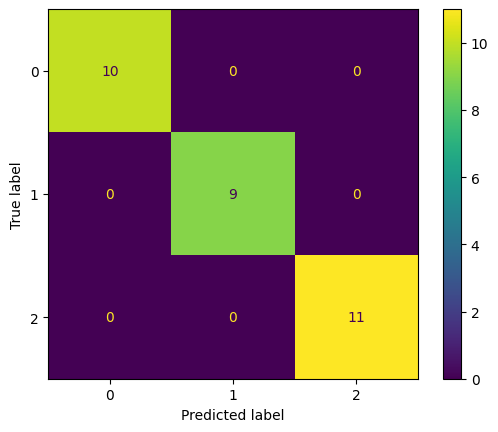

In [818]:
RFC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'irisRFC') #RFC Function


In [819]:
df_Housing.head()


,0,1,2,3,4,5,6,7,8
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [820]:
x_train, x_test, y_train, y_test = eda(df_Housing,8)


Label Count = 3842
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
(20640, 9)


In [821]:
RFR_Func(x_train, x_test, y_train, y_test,parameters,2,3,'HousesRFR') #RFR Function


Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 2/2] END .......................max_depth=1;, score=0.339 total time=   1.3s
[CV 1/2] END .......................max_depth=1;, score=0.346 total time=   1.7s
[CV 1/2] END .......................max_depth=2;, score=0.469 total time=   2.8s
[CV 2/2] END .......................max_depth=2;, score=0.468 total time=   3.0s
[CV 2/2] END .......................max_depth=3;, score=0.561 total time=   4.4s
[CV 1/2] END .......................max_depth=3;, score=0.567 total time=   4.5s
[CV 1/2] END .......................max_depth=4;, score=0.625 total time=   5.0s
[CV 2/2] END .......................max_depth=4;, score=0.619 total time=   4.9s
[CV 1/2] END .......................max_depth=5;, score=0.668 total time=   5.9s
[CV 2/2] END .......................max_depth=5;, score=0.670 total time=   7.5s
[CV 2/2] END .......................max_depth=6;, score=0.707 total time=   7.7s
[CV 1/2] END .......................max_depth=6;